<a href="https://colab.research.google.com/github/hermannKonyar/Iris_Bisecting_KMeans_Project/blob/main/Bisecting_KMeans_IrisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bisecting KMeans Algoritması İle Sınıflandırma Projesi

Denetimsiz öğrenme modeli olarak BiSecting Kmeans algoritmasını seçtik.

Seaborn kütüphanesi içerisinde bulunan Iris datasetini import edelim.

In [1719]:
import seaborn as sns

df=sns.load_dataset("iris")

Datasetimizde 4 numerik, 1 kategorik değişken bulunmaktadır.

In [1720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Datasetimizin normalizasyonunu sağlamak adına kolonları büyük harfli şekilde düzenleyelim.


In [1721]:
adlar = [x.upper() for x in df.columns]
adlar

['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH', 'SPECIES']

In [1722]:
df.columns=adlar

Datasetimizin düzenlenmiş halini kontrol edelim.Başarıya ulaştık!

In [1723]:
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Species kategorik değişkenimizi modelimizin başarılı sonuçlar vermesi için numerik değişkene dönüştürelim.

In [1724]:
c=[0 if x=="setosa" else 1 if x=="virginica" else 2 for x in df['SPECIES']]


In [1725]:
df['SPECIES']=c

Aşağıda da gördüğünüz gibi Species değişkeni numerik değişkene dönüştürüldü.

In [1726]:
df

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [1727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   SPECIES       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Kullanacağımız Sklearn kütüphanesindeki makine öğrenmesi algoritması olan Bisecting K-Means modelini ve sınıflandırdığımız verileri görselleştirmek için kullanacağımız Matplotlib kütüphanesini import edelim.

In [1728]:
from sklearn.cluster import BisectingKMeans
import matplotlib.pyplot as plt


Modelimizi Elkan yöntemi , 10000 iterasyon , 3 sınıflı ve rastegele değişken parametresini 12 seçerek oluşturalım.Ve modelimizi fit metodu ile eğitelim.

In [1729]:
model = BisectingKMeans(n_clusters=3,max_iter=10000,algorithm='elkan',random_state=12)
model.fit(df)

BisectingKMeans(algorithm='elkan', max_iter=10000, n_clusters=3,
                random_state=12)

Eğittiğimiz modele tahmin için verilerimizi gönderelim.Çıkan sonuçları datasetimize ayrı kolon olarak ekleyelim.

In [1730]:
df['CLUSTER']=model.predict(df)


In [1731]:
df

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,CLUSTER
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,1
146,6.3,2.5,5.0,1.9,1,1
147,6.5,3.0,5.2,2.0,1,1
148,6.2,3.4,5.4,2.3,1,1


Verilerimizde tahmin edilen kümeleri görselleştirelim.

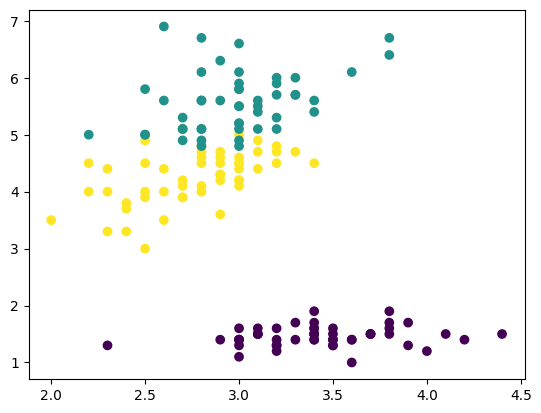

In [1732]:
plt.scatter(df.iloc[:,1],df.iloc[:,2],c=df['CLUSTER'])
plt.show()

Modelimizin başarı oranını hesaplayalım.

In [1733]:
point=0
for i in range(len(df)):
  if df.iloc[i,-1]==df.iloc[i,-2]:
    point+=1

In [1734]:
accuracy_sccore=point/len(df)*100

Görüldüğü gibi %99 oranında başarılı sınıflandırmış bir modele sahibiz.Random State parametresinin değişkenliğine bağlı olarak bu başarı oranı değişebilir.

In [1735]:
accuracy_sccore

99.33333333333333